<a href="https://colab.research.google.com/github/KlochkovSA/DSP_with_python/blob/master/Course_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исходные данные

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [2]:
A0 = 2; # Амплитуда ВЧ сигнала (В) 
f0 = 20e3; # Частота ВЧ сигнала (Гц) 
fd = 100e3; # Частота дискретизации 
N = 1e5; # Количество отсчетов

# Тип сигнала - треугольный импульс 
X1 = 8; # Амплитуда сигнала x1(t), (B)
X2 = 4; # Амплитуда сигнала x2(t), (B)

# Параметры сигнала со сложной модуляцией 
k1 = 0.9; # Индекс амплитудной модуляции 
k2 = 150; # Девиация частоты
k3 = 0; # Рад 
t1 = 10e-3; # Период первого сигнала 100Hz (мс)
t2 = 20e-3; # Период второго сигнала 50Hz (мс)
up_lim = N*t2; 

# Модулирующие сигналы

(0.0, 0.02)

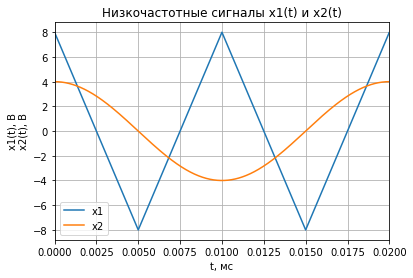

In [3]:
# формирование N отсчетов с частотой дискретизации fd
t = np.arange(int(N))*1/fd;
# Формирование Низкочастотных сигналов 
# Реализация треугольного импульса 
s1 = signal.sawtooth(2*np.pi*(1/t1)*t+np.pi, 0.5); 
s2 = np.cos(2*np.pi*(1/t2)*t); 
x1 = X1 * s1; 
x2 = X2 * s2; 
plt.plot(t,x1,label="x1");
plt.plot(t,x2,label="x2");
plt.title('Низкочастотные сигналы x1(t) и x2(t)'); 
plt.xlabel('t, мc'); 
plt.ylabel('x1(t), B\nx2(t), B');
plt.legend(); 
plt.grid(); 
axes = plt.gca();
axes.set_xlim([0,t2])

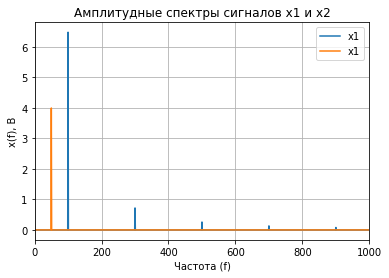

In [4]:


# фурье 
x1_fft = np.fft.fft(x1); 
x2_fft = np.fft.fft(x2); 

# Амплитудный спектр 1 сигнала 
P2_1 = np.abs(x1_fft/N);
P1_1 = P2_1[0:(int(N/2))];
P1_1[1:-1-1-1] = 2*P1_1[1:-1-1-1]

# Амплитудный спектр 2 сигнала 
P2_2 = np.abs(x2_fft/N);
P1_2 = P2_2[0:(int(N/2))];
P1_2[1:-1-1-1] = 2*P1_2[1:-1-1-1];

f = fd/N * np.arange(int(N/2));
plt.plot(f, P1_1,label="x1");
plt.plot(f, P1_2,label="x1");

axes = plt.gca();
axes.set_xlim([0,1000])
plt.title('Амплитудные спектры сигналов x1 и x2');
plt.xlabel('Частота (f)'); 
plt.ylabel('x(f), B');
plt.legend();
plt.grid();

# Радиосигнал со сложной модуляцией

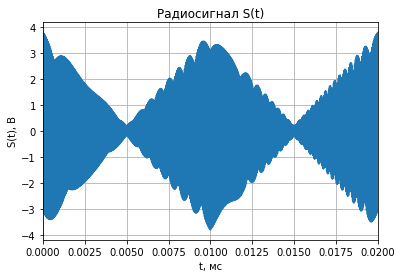

In [5]:
# Формирование радиосигнала со сложной модуляцией 

S = A0 * (s1*k1 + 1) * np.cos(2*np.pi*t*(f0 + k2 * s2 ) + k3*s2);
plt.plot(t,S); 
axes = plt.gca();
axes.set_xlim([0,t2])
plt.title('Радиосигнал S(t)'); 
plt.xlabel('t, мc'); 
plt.ylabel('S(t), В'); 
plt.grid();

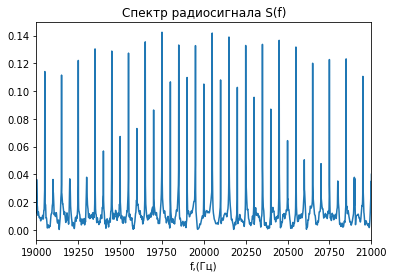

In [6]:
# Расчет спектра радиосигнала S(t)
RFSignal_fft = np.fft.fft(S); 


# Амплитудный спектр 1 сигнала 
P2_rf = np.abs(RFSignal_fft/N);
P1_rf = P2_rf[0:(int(N/2))];
P1_rf[1:-1-1-1] = 2*P1_rf[1:-1-1-1];

plt.plot(f, P1_rf);

plt.xlabel('f,(Гц)');
plt.title('Спектр радиосигнала S(f)'); 
axes = plt.gca();
axes.set_xlim([f0-10/t1,f0+10/t1]);